# Grundgerüst Leistungsausweis
Dieses Notebook soll euch als Grundgerüst für euren Leistungsnachweis dienen. Es soll euch eine Idee/ Hilfestellung bieten, wie man einen neuen Datensatz, basierend auf einer Fragestellung, strukturiert analysieren und interpretieren kann. Wie besagt, dient das Notebook als Hilfestellung, ist jedoch keinenfalls vollständig ausgeschöpft. In diesem Sinne dürft ihr auch gerne Sachen miteinbeziehen, welche hier nicht genannt werden. 

-> Bitte schreibt die Antwort zu den jeweiligen Punkten an oberster Stelle unterhalb der Titel (so wie dies auch im Leistungsnachweisbeispiel gemacht wurde).


## Struktur
1. Fragestellung(en) und Datenbeschaffung
2. Daten laden
3. Daten vorbereiten
4. Statistik der Rohdaten (Generell im Longformat)
5. Analyse der Daten

**Wichtig:** Alle graphischen Darstellungen sollten mindestens *Titel, Ticks- und Achsenbeschriftung* beinhalten (Siehe plots im Leistungsnachweisbeispiel)

---

## 1. Fragestellung(en) und Datenbeschaffung
### 1.1 Titel: 
Rauchen von 2000 bis 2020
### 1.2 Fragestellung:

- In welchen Ländern wurde am meisten geraucht, in welchen am wenigsten?

- Wo gab es die grössten Veränderungen des Raucheranteils von 2000 verglichen mit 2020?

- Wie sieht die Situation des Raucheranteils über die Untersuchten Jahre in der Schweiz aus?

- Gibt es einen Zusammenhang zwischen Raucheranteil und Todesfälle durch Passivrauchen (Vergleich von zwei Datensätzen)?

### 1.3 Datenquelle(n):
- https://ourworldindata.org/which-countries-smoke-most




### 1.4 Daten beschaffen und laden

In [3]:
# lade deine Bibliotheken -> Pandas, Seaborn, Matplotlib sind die wichtigsten für diese Aufgaben

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [8]:
df_adult_smokers = pd.read_csv('share-of-adults-who-smoke.csv', names=["Gebiet", "Code", "Jahr", "Raucheranteil in Prozent"], 
                 skiprows=1)
df_adult_smokers.drop("Code", axis='columns')

,Gebiet,Jahr,Raucheranteil in Prozent
0,Afghanistan,2000,36.9
1,Afghanistan,2005,32.7
2,Afghanistan,2010,29.1
3,Afghanistan,2015,26.0
4,Afghanistan,2018,23.8
...,...,...,...
1234,Zimbabwe,2010,15.6
1235,Zimbabwe,2015,13.6
1236,Zimbabwe,2018,12.1
1237,Zimbabwe,2019,12.1


## 2. Daten vorbereiten 
- Die Daten sind bereits im Long-Format
- Die Namen der Spalten und Zeilen wurden von Englisch auf Deutsch geändert.
- Da die Spalte Codes nicht analysiert wird, haben wir sie rausgenommen.
- Für die weitere Bearbeitung werden die Daten pivotiert. Jede Spalte ist ein Gebiet, in den Zeilen sind die untersuchten Jahre geliestet.


In [9]:
df_adult_smokers_pivot = df_adult_smokers.pivot(index='Jahr', columns='Gebiet', values='Raucheranteil in Prozent')
df_adult_smokers_pivot.head()

Gebiet,Afghanistan,Albania,Algeria,Andorra,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,...,United States,Upper-middle-income countries,Uruguay,Uzbekistan,Vanuatu,Vietnam,World,Yemen,Zambia,Zimbabwe
Jahr,,,,,,,,,,,,,,,,,,,,,
2000,36.9,35.0,22.2,35.9,34.0,32.0,24.4,52.3,28.7,10.7,...,33.8,27.407335,35.3,24.9,25.6,29.8,34.151490,27.3,19.9,21.0
2005,32.7,31.3,21.8,34.8,31.5,30.3,21.1,43.8,27.6,10.7,...,30.6,26.200441,31.2,22.7,23.3,28.3,30.748830,25.3,18.1,18.1
2010,29.1,28.0,21.5,34.0,28.9,28.6,18.2,37.1,26.2,10.7,...,28.0,24.975590,27.5,20.9,21.3,27.0,27.767239,23.4,16.7,15.6
2015,26.0,25.1,21.1,33.0,26.6,26.9,15.7,31.2,25.2,10.6,...,25.3,23.911661,24.3,19.1,19.4,26.0,25.223902,21.8,15.5,13.6
2018,23.8,23.0,21.0,32.0,24.9,25.8,14.0,27.1,24.2,10.7,...,23.4,23.170973,22.0,17.8,18.2,25.0,23.428180,20.5,14.6,12.1


## 3. Statistik der Rohdaten (Analyse im Long-Format)
- Ist meine Variable kontinuierlich oder diskret? Falls diskret, wieviele einzigartige Klassen gibt es? Wieviele Datenpunkte pro Klasse sind vorhanden?
- Anzahl Datenpunkte (Beschreibend und Graphische Darstellung)
    - Wieviele Datenpunkte sind für die bestimmten Variabeln vorhanden?
    - Wo fehlen Datenpunkte?
- Wie ist die Verteilung der zu untersuchenden Variabel(n) (Histogram, Boxplot, Säulendiagram)
- Vermutest du Zusammenhänge zwischen zwei Variabeln (Streuungsdiagramm, Korrelationsmatrix)

*Notiz: Zu jeder Kolumne sollte generell eine Aussage möglich sein.*

### Datentypen im Datensatz

In [10]:
df_adult_smokers.dtypes

Gebiet                       object
Code                         object
Jahr                          int64
Raucheranteil in Prozent    float64
dtype: object

### 3.1 Analyse Gebiet
- Der Datensatzt umfasst 177 Gebiete/Länder.
- Jedes Land hat 7 Einträge.

In [11]:
len(df_adult_smokers['Gebiet'].unique())

177

In [12]:
## Anzahl Datenpunkte (counts) pro Gebiet/ Land
df_adult_smokers['Gebiet'].value_counts()

Gebiet
Afghanistan      7
Lesotho          7
Namibia          7
Nauru            7
Nepal            7
                ..
Ghana            7
Greece           7
Guatemala        7
Guinea-Bissau    7
Zimbabwe         7
Name: count, Length: 177, dtype: int64

<Axes: title={'center': 'Anzahl Datenpunkte pro Gebiet'}, xlabel='Gebiet', ylabel='Anzahl Datenpunkte'>

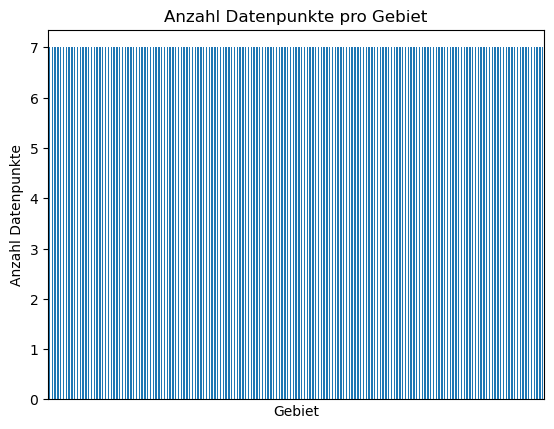

In [13]:
df_adult_smokers['Gebiet'].value_counts().plot(kind = 'bar', 
                                 xticks=[], 
                                 ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Gebiet')




### 3.2 Analyse Jahr
- Es wurden sieben Jahre untersucht.
- Die gelisteten Jahre haben für jedes Land je einen Eintrag.

In [14]:
len(df_adult_smokers['Jahr'].unique())

7

In [15]:
df_adult_smokers['Jahr'].value_counts()

Jahr
2000    177
2005    177
2010    177
2015    177
2018    177
2019    177
2020    177
Name: count, dtype: int64

<Axes: title={'center': 'Anzahl Datenpunkte pro Jahr'}, xlabel='Jahr', ylabel='Anzahl Datenpunkte'>

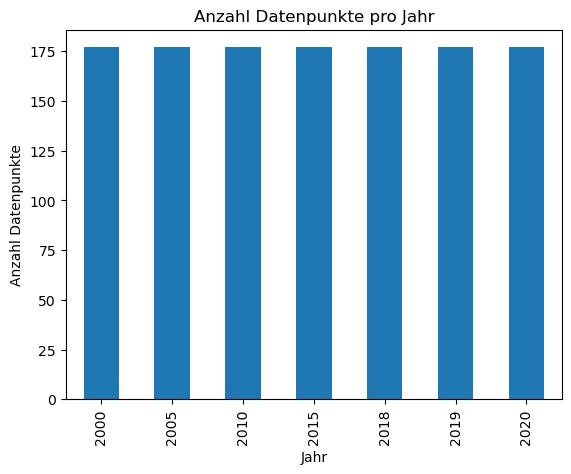

In [16]:
df_adult_smokers['Jahr'].value_counts().plot(kind='bar',
                                 xlabel='Jahr',
                                 ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Jahr')

### 3.3 Analyse Raucheranteil in Prozent

- Es gibt 1239 Einträge, also 177 Gebiete * 7 Jahre = 1239
- Der kleinste Raucheranteil von 3.5% wurde im Jahr 2020 in Gahna verzeichnet.
- Kiribati hat mit 68.5% im Jahr 2000 den höchsten Raucheranteil.

In [17]:
len(df_adult_smokers['Raucheranteil in Prozent'])

1239

In [18]:
df_adult_smokers['Raucheranteil in Prozent'].describe()

count    1239.000000
mean       23.724252
std        10.925224
min         3.500000
25%        14.500000
50%        23.600000
75%        31.100000
max        68.500000
Name: Raucheranteil in Prozent, dtype: float64

In [19]:
## Minimum mit zugehörigem Land ausgeben?
kleinster_Wer = df_adult_smokers['Raucheranteil in Prozent'].min()
pos = df_adult_smokers['Raucheranteil in Prozent'] == df_adult_smokers['Raucheranteil in Prozent'].min()
df_adult_smokers.loc[pos, :]


,Gebiet,Code,Jahr,Raucheranteil in Prozent
433,Ghana,GHA,2020,3.5


In [20]:
## Maxiumum mit zugehörigem Land ausgeben?
grösster_Wert = df_adult_smokers['Raucheranteil in Prozent'].max()
pos = df_adult_smokers['Raucheranteil in Prozent'] == df_adult_smokers['Raucheranteil in Prozent'].max()
df_adult_smokers.loc[pos, :]

,Gebiet,Code,Jahr,Raucheranteil in Prozent
574,Kiribati,KIR,2000,68.5


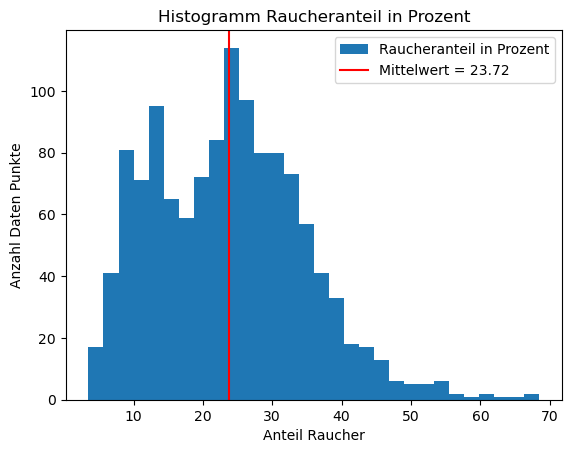

In [21]:
g = df_adult_smokers['Raucheranteil in Prozent'].plot(kind='hist', bins=30, title='Histogramm Raucheranteil in Prozent', 
                                     xlabel='Anteil Raucher', ylabel='Anzahl Daten Punkte')
mean = df_adult_smokers['Raucheranteil in Prozent'].mean()
g.axvline(x=df_adult_smokers['Raucheranteil in Prozent'].mean(), color='red',label=f'Mittelwert = {mean:.2f}')
g.legend()

## 4. Analyse 

### Vorgehen
- Spezifische Untersuchung der Fragestellung (Berechnungen)
- Visualisieren der Resultate: Verwendet Achsenbeschriftung und überlegt euch, welche Art von Darstellung sinnvoll ist (Kuchen-, Säulen, Liniendiagramm; 2 y-Achsen?)
- Beschreiben der Beobachtungen
- Interpretation der Resultate (Hypothesen zu den Resultaten)
- Untermauern der Interpretation mittels Hinweise zur Literatur (Mögliche Zusammenhänge aufzeigen).



## 4.1 Analyse Raucheranteil
### Berechnungen
Differenz des Raucheranteils Jahr 2020 vs 2000

In [22]:
diffs = df_adult_smokers_pivot.loc[2020] - df_adult_smokers_pivot.loc[2000]
diffs = diffs.sort_values()
diffs


Gebiet
Nepal          -34.1
Sierra Leone   -30.2
Kiribati       -27.9
Norway         -27.8
India          -27.3
                ... 
Indonesia        2.2
Croatia          2.5
Congo            2.6
Moldova          3.7
Jordan           4.1
Length: 177, dtype: float64

<Axes: title={'center': 'Grösste und kleinste Differenzen des Raucheranteils von 2020 vs 2000'}, xlabel='Differenz Jahr 2020-2000', ylabel='Gebiet'>

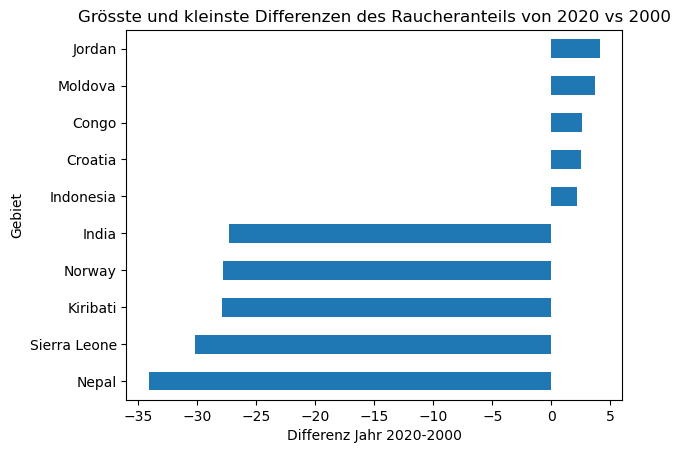

In [23]:
diff_sel = (diffs < -27) | (diffs > 2)  # Auswahl der grössten und kleinsten Differenzen
diffs[diff_sel].plot(kind='barh', title='Grösste und kleinste Differenzen des Raucheranteils von 2020 vs 2000',
                     xlabel='Differenz Jahr 2020-2000')

In [24]:
Gebiete_liste = diffs[diff_sel].index.tolist()  # Liste der Gebiete mit grössten und kleinsten Differenzen
print(Gebiete_liste)

['Nepal', 'Sierra Leone', 'Kiribati', 'Norway', 'India', 'Indonesia', 'Croatia', 'Congo', 'Moldova', 'Jordan']


### Visualisierungen

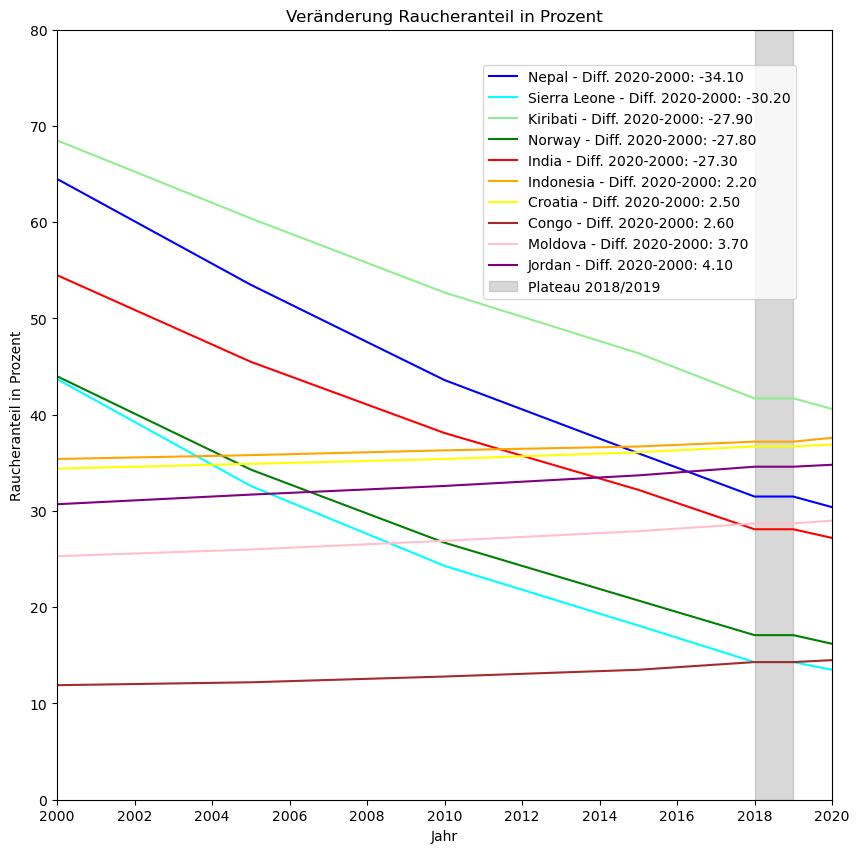

In [25]:
color_dict = {
    'Nepal': 'blue',
    'Sierra Leone': 'cyan',
    'Kiribati': 'lightgreen',
    'Norway': 'green',
    'India': 'red',
    'Indonesia': 'orange',
    'Croatia': 'yellow',
    'Congo': 'brown',
    'Moldova': 'pink',
    'Jordan': 'purple'
}
for Gebiet in Gebiete_liste:
    diff=diffs[Gebiet]
    g=df_adult_smokers_pivot[Gebiet].plot(title='Veränderung Raucheranteil in Prozent', xlabel='Jahr', ylabel='Raucheranteil in Prozent',
                                legend=True,
                                label=f'{Gebiet} - Diff. 2020-2000: {diff:.2f}', # für die Legende, .2f--> 2 Nachkommastellen
                                xlim=[2000,2020], xticks=range(2000, 2021, 2), ylim=[0,80],
                                color=color_dict[Gebiet], 
                                figsize=(10, 10))
g.axvspan(2018, 2019, color = 'gray', alpha = 0.3, label = 'Plateau 2018/2019')
g.legend(loc=[0.55, 0.65])


<Axes: title={'center': 'Grösste Abnahme Raucheranteil'}, xlabel='Gebiet', ylabel='Raucheranteil in Prozent'>

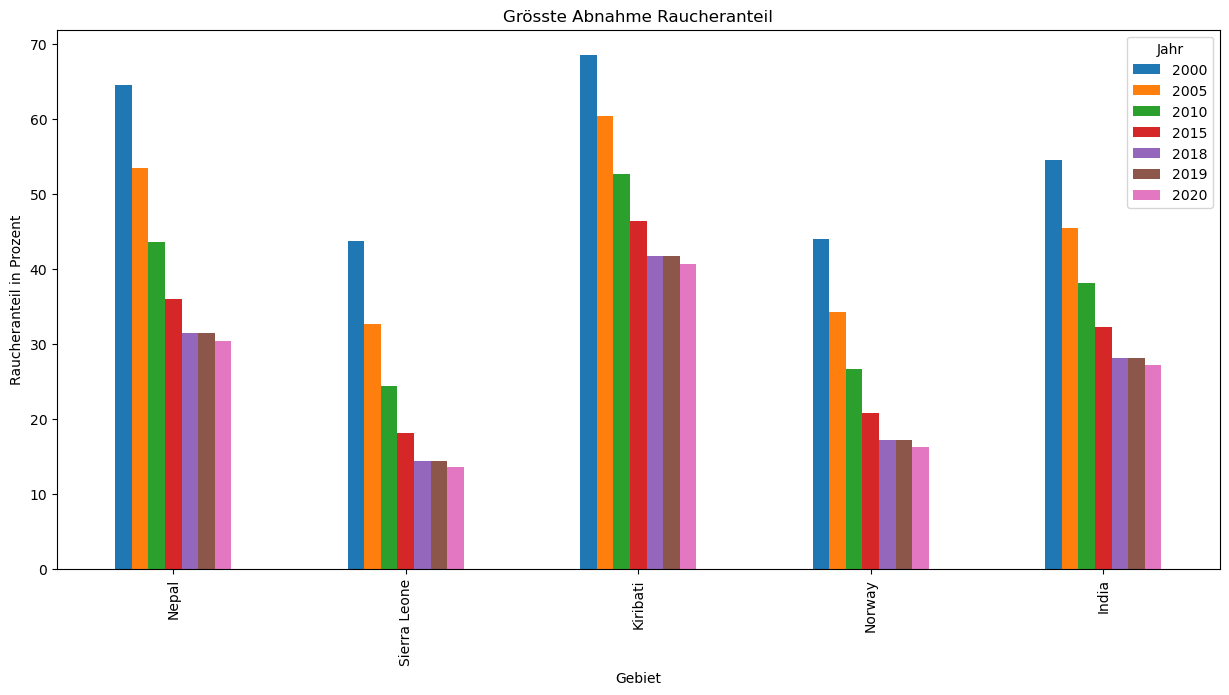

In [26]:
df_differenzen = df_adult_smokers_pivot[['Nepal', 'Sierra Leone', 'Kiribati', 'Norway', 'India']]
df_differenzen.T.plot(kind = 'bar', title = 'Grösste Abnahme Raucheranteil',
                      xlabel = 'Gebiet', 
                      ylabel = 'Raucheranteil in Prozent', 
                      figsize = (15, 7))



<Axes: title={'center': 'Grösste Zunahme Raucheranteil'}, xlabel='Gebiet', ylabel='Raucheranteil in Prozent'>

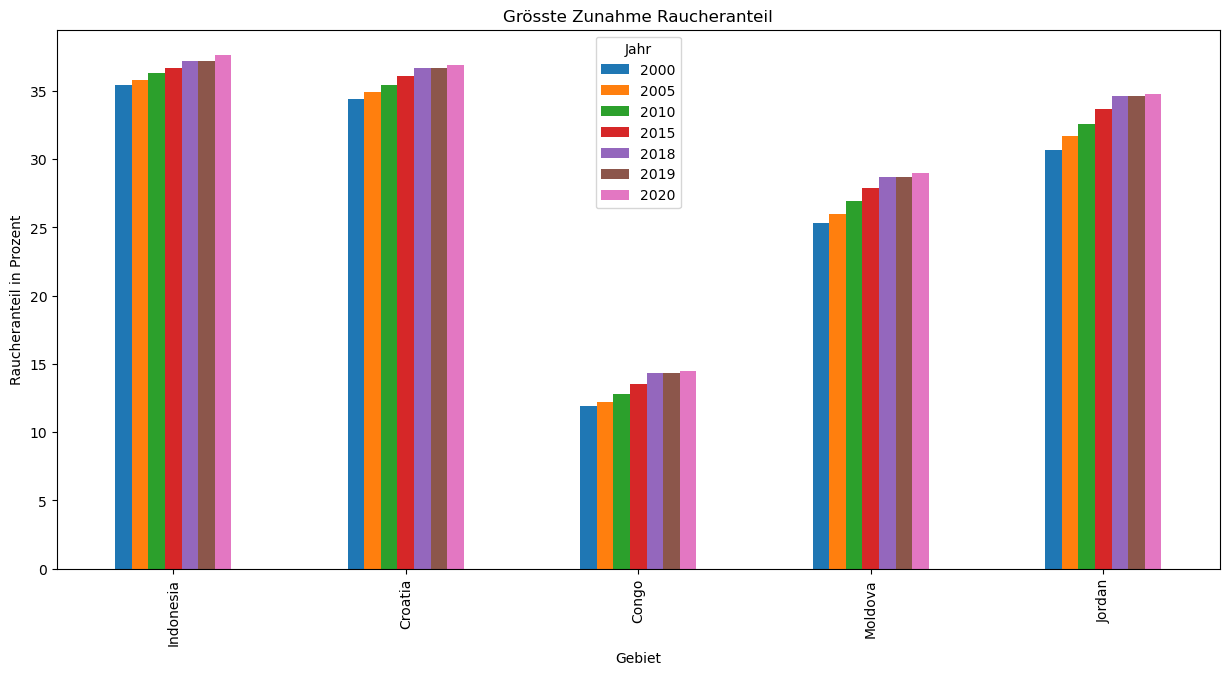

In [27]:
df_differenzen = df_adult_smokers_pivot[['Indonesia', 'Croatia', 'Congo', 'Moldova', 'Jordan']]
df_differenzen.T.plot(kind = 'bar', title = 'Grösste Zunahme Raucheranteil',
                      xlabel = 'Gebiet', 
                      ylabel = 'Raucheranteil in Prozent', 
                      figsize = (15, 7))



Beobachtung: 
Bei allen Ländern aus der Liste der grössten und kleinsten Differenzen zeigt sich über alle untersuchten Jahre ein Plateau bei 2018/2019.

### Wie ist die Situation in der Schweiz?

In [28]:
df_switzerland = df_adult_smokers[df_adult_smokers['Gebiet']=='Switzerland']
df_switzerland



,Gebiet,Code,Jahr,Raucheranteil in Prozent
1085,Switzerland,CHE,2000,28.3
1086,Switzerland,CHE,2005,27.7
1087,Switzerland,CHE,2010,26.9
1088,Switzerland,CHE,2015,26.2
1089,Switzerland,CHE,2018,25.7
1090,Switzerland,CHE,2019,25.7
1091,Switzerland,CHE,2020,25.5


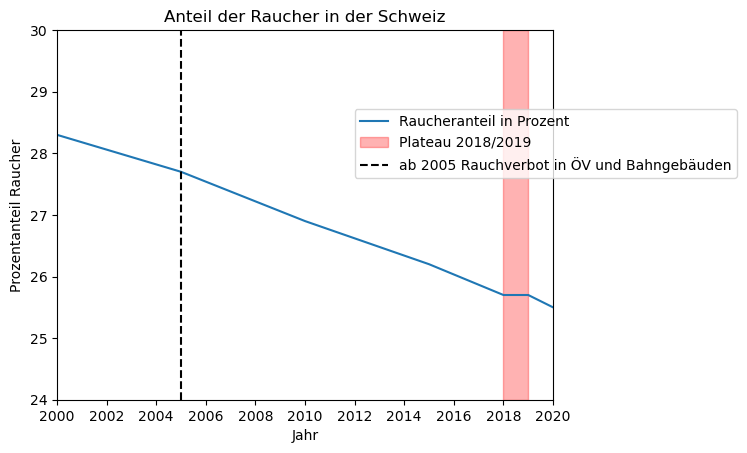

In [29]:
ax = df_switzerland.plot(x='Jahr', y='Raucheranteil in Prozent',
    title ='Anteil der Raucher in der Schweiz',
    xlabel = 'Jahr',  xlim = ([2000, 2020]), xticks = (range(2000, 2021, 2)), 
    ylabel = 'Prozentanteil Raucher', ylim = ([24, 30]))
ax.axvspan(2018, 2019, color = 'red', alpha = 0.3, label = 'Plateau 2018/2019')
ax.axvline(2005, color = 'black', linestyle = '--', label = 'ab 2005 Rauchverbot in ÖV und Bahngebäuden')
ax.legend(loc = [0.6, 0.6])



Beobachtung: 
- In der Schweiz ist der Raucheranteil über die untersuchten Jahre relativ stabiel und zeigt eine leichte aber kontinuierliche Abnahme. 
- 2005 zeigt sich ein leichter Knick in der Kurve.
- Zwischen 2018 und 2019 finden wir ebenfalls ein kleines Plateau, bevor die Kurve dann im Folgejahr wieder eine fallende Struktur zeigt.

## 5. Interpretation

Situation in der Schweiz:
- Ab 2005 wurde das Rauchen in allen Zügen, Bussen, Schiffen, sowie in öffentlichen Bahngebäuden verboten (Leichter Knick in der Kurve bei 2005).
- Die Zigarettenpreise und der Tabaksteuer zeigen eine leicht schwankende aber kontinuierliche Zunahme. Das beobachtete kleine Plateau zwischen 2018 und 2019 in der obigen Analysegrafik findet man auch in der Grafik des BAZG wieder. Ab dem Jahr 2014 flach die Tabaksteurkurve ab und schwakt nur noch milde. 
- Auf kantonaler Ebene werden diverse Präveentionsprojekte lanciert, um den Tabakkonsum einzudämmen und Jugednliche und Nichtraucher:innen zu schützen.

Ineressante und erschreckende Reportage zur Zigarettenherstellung und Kontrolle in der Schweiz, sowie dem Zigarettenexport.
https://stories.publiceye.ch/tabak/



Situation Weltweit:
- 2003 lancierte die WHO ein Rahmenübereinkommen zur Eindämmung des Tabakgebrauchs und 2008 die Kampgne MPOWER mit Massnahmen zur Tabakkontrolle. Norwegen hat diese Massnahmen akribisch umgesetz und die Tabaksteuer massiv erhöht, Nepal und Idonesien haben mehr Gewicht auf Präventionsmassnahmen wie Warnhinweise ind Bildformat auf den Verpackungen und Rauchausteigerprojekte gelegt. Ob die leichte Abflachung zwischen 2018 und 2019 ebenfalls mit den WHO Kampagnen im Zusammenhang steht, ist denkbar, lässt sich so aber nicht sagen und bedürfte einer weiterführenden Recherche unter Einzelbetrachtung der Massnahmen Umsetzungen und Konsumentwicklungen der einzelnen Länder.
- Die grösste Zunahme des Raucheranteils zeigte Jordanien. Recherchen zu folge ist die Tabaksteuer in Afrikanischenländern sher gering bis nicht vorhanden. Grosskonzerne sehen darin die Chance ihren Absatzmarkt nach Afrika auszulagern. 

- Bundesamt für Zoll und Grenzsicherheit BAZG, Tabak- und Biersteuer
- https://www.bag.admin.ch/bag/de/home/strategie-und-politik/politische-auftraege-und-aktionsplaene/politische-auftraege-zur-tabakpraevention/tabakpolitik-kantone.html
- https://www.dkfz.de/de/tabakkontrolle/download/Publikationen/AdWfP/AdWfdP_2019_Tabaksteuererhoehungen_final.pdf
- https://www.nzz.ch/international/rauchen-in-afrika-die-tabak-industrie-setzt-auf-expansion-ld.1675669
- https://www.dkfz.de/de/tabakkontrolle/download/Publikationen/WissPublikationen/Tabakkontrolle_in_Deutschland_und_weltweit_2012.pdf
- https://www.swissinfo.ch/ger/rauchverbot-im-oeffentlichen-verkehr-kommt/4589824
- https://www.who.int/initiatives/mpower
- https://www.nichtraucherhelden.de/magazine/wo-das-meiste-geld-in-rauch-aufgeht-zigarettenpreise-im-vergleich-136














### Anteil der Todesfälle durch Passivrauchen, 1990-2019

Gruppe: Meret Niklaus, Lisa Greiter, Nadja Eggen
### Fragestellung:
- Wo sind die meisten Todesfälle durch Passivrauchen*innen, wo die wenigsten?
- Wo ist die stärkste Zunahme wo die stärkste Abnahme?
- Wie sieht es in der Schweiz aus?

### Datenquelle(n):
- https://ourworldindata.org/grapher/share-deaths-secondhand-smoke




In [4]:
df_secondhand_death = pd.read_csv('share-deaths-secondhand-smoke.csv')
df_secondhand_death.drop(axis=1,columns=('Code'))

,Entity,Year,"Share of total deaths that are from all causes attributed to secondhand smoke, in both sexes aged age-standardized"
0,Afghanistan,1990,2.713029
1,Afghanistan,1991,2.680599
2,Afghanistan,1992,2.709394
3,Afghanistan,1993,2.736614
4,Afghanistan,1994,2.706579
...,...,...,...
6835,Zimbabwe,2015,1.375695
6836,Zimbabwe,2016,1.395783
6837,Zimbabwe,2017,1.411269
6838,Zimbabwe,2018,1.437165


## 2. Daten vorbereiten 
- Die Rohdaten sind bereits im Long-Format.
- Der "Code" zu den Ländern wurde entfernt (da nicht relevant) und die Namen der Datentypen umbennent sowie auf 2 Kommastellen gerundet.


In [5]:
df_secondhand_death=pd.read_csv('share-deaths-secondhand-smoke.csv', names=['Gebiet','Code', 'Jahr', 'Todesfälle in Prozent'],
               skiprows=1)
df_secondhand_death['Todesfälle in Prozent']=df_secondhand_death['Todesfälle in Prozent'].round(2)
df_secondhand_death.drop(axis=1,columns=('Code'))

,Gebiet,Jahr,Todesfälle in Prozent
0,Afghanistan,1990,2.71
1,Afghanistan,1991,2.68
2,Afghanistan,1992,2.71
3,Afghanistan,1993,2.74
4,Afghanistan,1994,2.71
...,...,...,...
6835,Zimbabwe,2015,1.38
6836,Zimbabwe,2016,1.40
6837,Zimbabwe,2017,1.41
6838,Zimbabwe,2018,1.44


In [6]:
df_pivot = df_secondhand_death.pivot(index='Jahr', columns='Gebiet', values='Todesfälle in Prozent')
df_pivot.head()

Gebiet,Afghanistan,African Region (WHO),Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,Uzbekistan,Vanuatu,Venezuela,Vietnam,Wales,Western Pacific Region (WHO),World,Yemen,Zambia,Zimbabwe
Jahr,,,,,,,,,,,,,,,,,,,,,
1990,2.71,1.01,4.82,3.70,4.05,1.75,0.88,1.46,2.84,4.41,...,2.71,2.38,2.29,2.99,2.42,4.44,2.58,3.01,0.90,1.40
1991,2.68,1.00,4.83,3.71,4.07,1.75,0.89,1.48,2.83,4.36,...,2.73,2.46,2.29,3.00,2.33,4.45,2.56,3.01,0.87,1.31
1992,2.71,1.00,4.80,3.70,4.09,1.74,0.88,1.49,2.83,4.35,...,2.77,2.51,2.26,3.02,2.26,4.45,2.56,3.01,0.83,1.22
1993,2.74,0.99,4.73,3.69,4.11,1.72,0.85,1.49,2.82,4.31,...,2.80,2.55,2.21,3.03,2.22,4.44,2.55,3.02,0.80,1.10
1994,2.71,0.93,4.64,3.66,4.14,1.70,0.87,1.49,2.80,4.25,...,2.83,2.63,2.17,3.04,2.16,4.41,2.51,3.01,0.77,1.01


In [7]:
df_secondhand_death_pivot = df_secondhand_death.pivot(index='Jahr', columns='Gebiet', values='Todesfälle in Prozent')
df_secondhand_death_pivot.head()

Gebiet,Afghanistan,African Region (WHO),Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,Uzbekistan,Vanuatu,Venezuela,Vietnam,Wales,Western Pacific Region (WHO),World,Yemen,Zambia,Zimbabwe
Jahr,,,,,,,,,,,,,,,,,,,,,
1990,2.71,1.01,4.82,3.70,4.05,1.75,0.88,1.46,2.84,4.41,...,2.71,2.38,2.29,2.99,2.42,4.44,2.58,3.01,0.90,1.40
1991,2.68,1.00,4.83,3.71,4.07,1.75,0.89,1.48,2.83,4.36,...,2.73,2.46,2.29,3.00,2.33,4.45,2.56,3.01,0.87,1.31
1992,2.71,1.00,4.80,3.70,4.09,1.74,0.88,1.49,2.83,4.35,...,2.77,2.51,2.26,3.02,2.26,4.45,2.56,3.01,0.83,1.22
1993,2.74,0.99,4.73,3.69,4.11,1.72,0.85,1.49,2.82,4.31,...,2.80,2.55,2.21,3.03,2.22,4.44,2.55,3.02,0.80,1.10
1994,2.71,0.93,4.64,3.66,4.14,1.70,0.87,1.49,2.80,4.25,...,2.83,2.63,2.17,3.04,2.16,4.41,2.51,3.01,0.77,1.01


- Für die Analyse werden die Daten pivotiert: Jede Spalte repräsentiert eine Region, die Zeilen sind die verschiedenen Jahre - in absteigender Reihenfolge.

## 3. Statistik der Rohdaten (Analyse im Long-Format)

über die einzelnen Spalten kann folgendes ausgesagt werden:
- Die Spalte *Gebiete* enthält 228 verschieden Gebiete.
- Die Spalte *Jahr* enthält, passend zu jedem Gebieten, je 30 Datenpunkte (von 1990-2019).
- Der Datensatz ist von Beginn an kmplett.
- Die *Todesfälle der Passivraucher*innen streut zwischen 0.15 und 5.3 Prozent.

In [8]:
df_secondhand_death.dtypes

Gebiet                    object
Code                      object
Jahr                       int64
Todesfälle in Prozent    float64
dtype: object

#### 3.1 Analyse Gebiete

In [9]:
print('Anzahl verschiedener Gebiete:',len(df_secondhand_death['Gebiet'].unique()))

Anzahl verschiedener Gebiete: 228


In [10]:
df_secondhand_death['Gebiet'].value_counts()


Gebiet
Afghanistan           30
Nigeria               30
North America (WB)    30
North Korea           30
North Macedonia       30
                      ..
Grenada               30
Guam                  30
Guatemala             30
Guinea                30
Zimbabwe              30
Name: count, Length: 228, dtype: int64

<Axes: title={'center': 'Anzahl Datenpunkte pro Gebiet'}, xlabel='Gebiet', ylabel='Anzahl Datenpunkte'>

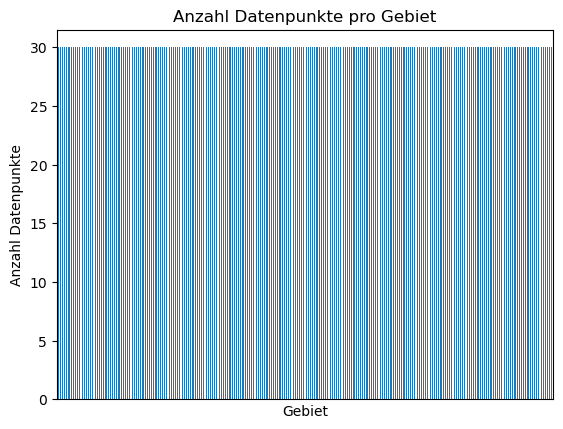

In [11]:
df_secondhand_death['Gebiet'].value_counts().plot(kind='bar',
                                 xticks=[],
                                 ylabel='Anzahl Datenpunkte',xlabel='Gebiet', title='Anzahl Datenpunkte pro Gebiet')

#### 3.2 Analyse Jahre und Datenpunkte

In [12]:
print('Datenpunkten Jahr, pro Gebiet:',len(df_secondhand_death['Jahr'].unique()))

Datenpunkten Jahr, pro Gebiet: 30


In [13]:
df_secondhand_death['Jahr'].value_counts().sort_index()

Jahr
1990    228
1991    228
1992    228
1993    228
1994    228
1995    228
1996    228
1997    228
1998    228
1999    228
2000    228
2001    228
2002    228
2003    228
2004    228
2005    228
2006    228
2007    228
2008    228
2009    228
2010    228
2011    228
2012    228
2013    228
2014    228
2015    228
2016    228
2017    228
2018    228
2019    228
Name: count, dtype: int64

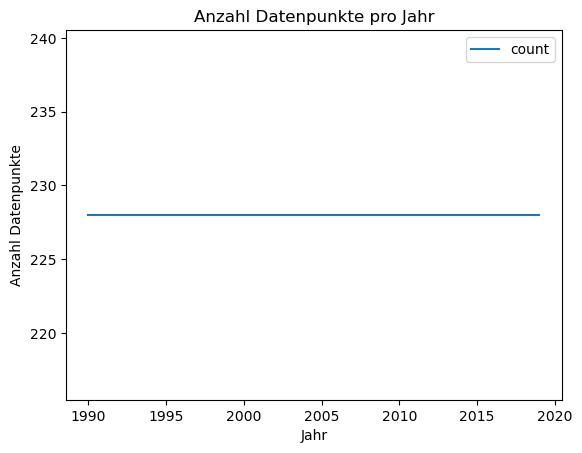

In [14]:
g = df_secondhand_death['Jahr'].value_counts().sort_index().plot(ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Jahr'); 
g.legend() 

#### 3.3 Analyse Todesfälle der Passivraucher*innen in Prozent

In [15]:
df_secondhand_death.describe().round(2)

,Jahr,Todesfälle in Prozent
count,6840.00,6840.00
mean,2004.50,2.17
std,8.66,1.13
min,1990.00,0.15
25%,1997.00,1.26
50%,2004.50,1.97
75%,2012.00,3.03
max,2019.00,5.30


## 4. Analyse 

### Vorgehen

### Beobachtungen
- Die wenigsten Todesfälle durch Passivrauchen hatte im Jahr 1994 Rwanda, mit 0.15%.
- Die meisten Todesfälle durch Passivrauchen hatte im Jahr 2005 Palau mit 5.3%. 

- Grösste Zunahme (1990-2019) der Todesfälle durch Passivrauchen hatte Kiribati mit +0.94%.
- Grösste Abnahme (1990-2019) der Todesfälle durch Passivrauchen Hatte die Türkei mit -1.72%. 
### Interpretation
Die Todesfälle durch Passivrauchen sind vorallem in den asiatischen/arabischen Regionen besonders hoch. Dies lässt sich darauf zurück führen, dass sehr viel in der eigenen Wohnung/ Hotelzimmer geraucht wird. Der Rauch kann schlecht entweichen und wird von allen Menschen, welche sich im selben Raum befinden, eingeatmet.

Seit das Rauchen aufgekommen ist, hat es in diversen Ländern (auch in der Schweiz) immer wieder Restriktionen gegeben.
Wie z.B.

- Rauchverbot in den öffentlichen Verkehrsmitteln
- Rauchverbot in Restaurants
- Bestimmte Werbeformate

Dies bedingt sicher die Abnahme der Todesälle von Passivraucher*innen, wie auch die steigenden Kosten der Zigaretten.


Im Vergleich Todesfälle der Passivraucher*innen in Prozent VS. Raucher wird noch weiter verglichen.



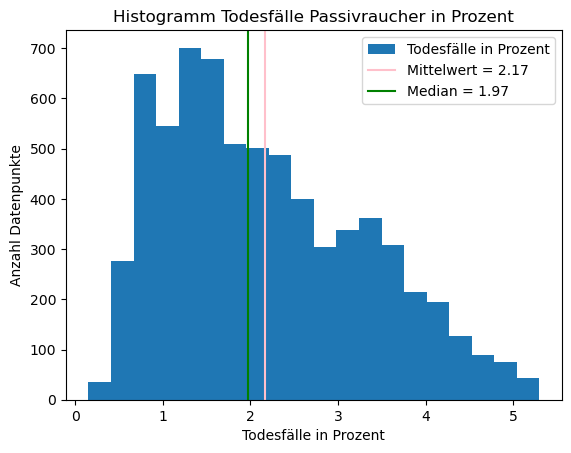

In [16]:
g = df_secondhand_death['Todesfälle in Prozent'].plot(kind='hist', bins=20, title='Histogramm Todesfälle Passivraucher in Prozent', 
                           xlabel='Todesfälle in Prozent', ylabel='Anzahl Datenpunkte',)
mean = df_secondhand_death['Todesfälle in Prozent'].mean()
g.axvline(x=df_secondhand_death['Todesfälle in Prozent'].mean(), color='pink',label=f'Mittelwert = {mean:.2f}')  # rote Linie bei Mittelwert

median = df_secondhand_death['Todesfälle in Prozent'].median()
g.axvline(x=df_secondhand_death['Todesfälle in Prozent'].median(), color='green',label=  f'Median = {median:.2f}')  # orange Linie bei Median

g.legend()

In [17]:
df_secondhand_death_pivot.index

Index([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019],
      dtype='int64', name='Jahr')

In [18]:
2019 in df_secondhand_death_pivot.index

True

In [19]:
df_secondhand_death_pivot.dtypes

Gebiet
Afghanistan                     float64
African Region (WHO)            float64
Albania                         float64
Algeria                         float64
American Samoa                  float64
                                 ...   
Western Pacific Region (WHO)    float64
World                           float64
Yemen                           float64
Zambia                          float64
Zimbabwe                        float64
Length: 228, dtype: object

In [20]:
diffs = df_secondhand_death_pivot.loc[2019]-df_secondhand_death_pivot.loc[1990]   # Differenz zwischen 2021 und 2011
diffs = diffs.sort_values().dropna()  # sortieren nach Differenz und NaN-Werte entfernen
diffs

Gebiet
Turkey       -1.72
Albania      -1.53
Ireland      -1.49
China        -1.36
Iceland      -1.25
              ... 
Indonesia     0.62
Montenegro    0.69
Bangladesh    0.70
Fiji          0.73
Kiribati      0.94
Length: 228, dtype: float64

<Axes: title={'center': 'Grösste und kleinste Differenzen der Tode in Prozent'}, ylabel='Gebiet'>

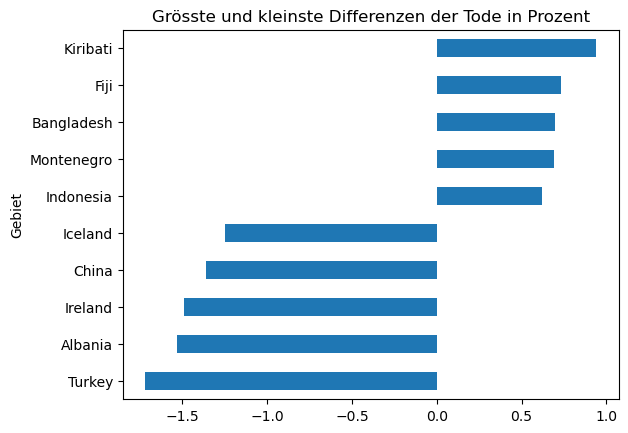

In [21]:
diff_sel = (diffs < -1.24) | (diffs > 0.61)  # Auswahl der grössten und kleinsten Differenzen
diffs[diff_sel].plot(kind='barh', title='Grösste und kleinste Differenzen der Tode in Prozent')

In [22]:
Gebiets_liste = diffs[diff_sel].index.tolist()  # Liste der Gebiete mit grössten und kleinsten Differenzen
print(Gebiets_liste)

['Turkey', 'Albania', 'Ireland', 'China', 'Iceland', 'Indonesia', 'Montenegro', 'Bangladesh', 'Fiji', 'Kiribati']


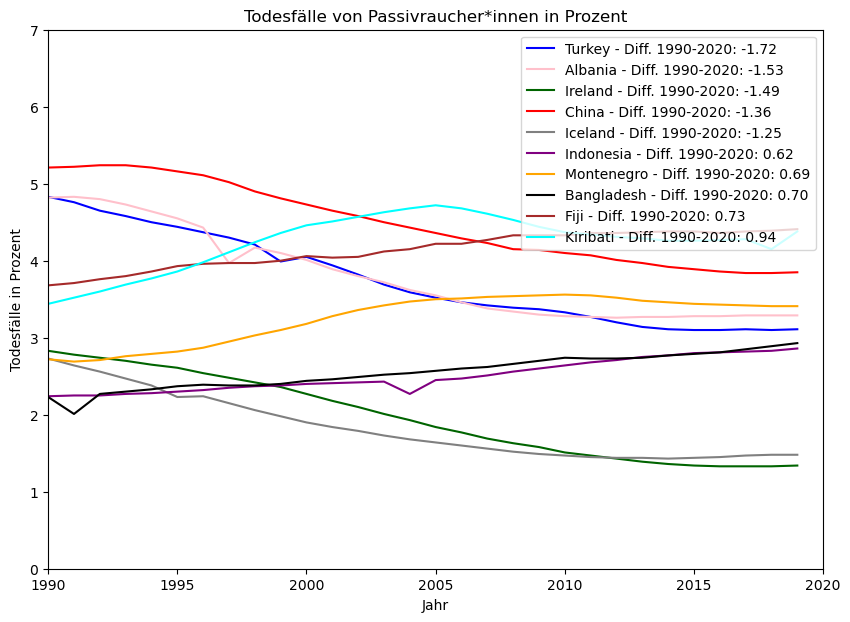

In [23]:
color_dict= {
    'Turkey': 'blue', 
    'Albania': 'pink',
    'Ireland': 'darkgreen',
    'China': 'red',
    'Iceland': 'grey',
    'Indonesia': 'purple',
    'Montenegro': 'orange', 
    'Bangladesh': 'black',
    'Fiji': 'brown',
    'Kiribati': 'cyan',
}
for gebiet in Gebiets_liste:
    diff = diffs[gebiet]
    g = df_secondhand_death_pivot[gebiet].plot(title='Todesfälle von Passivraucher*innen in Prozent', xlabel='Jahr', ylabel=f'Todesfälle in Prozent', legend=True,
                                  label=f'{gebiet} - Diff. 1990-2020: {diff:.2f}', # für die Legende
                                  xlim=[1990,2020], ylim= [0,7.0], # x- und y-Achsen begrenzen
                                  color=color_dict[gebiet],        # Farbe aus color_dict
                                  figsize=(10,7))                   # Grösse des Plots
 



In [24]:
df_secondhand_death.sort_values(by='Todesfälle in Prozent')

,Gebiet,Code,Jahr,Todesfälle in Prozent
5044,Rwanda,RWA,1994,0.15
2570,Haiti,HTI,2010,0.31
1963,Ethiopia,ETH,2003,0.34
1960,Ethiopia,ETH,2000,0.34
1964,Ethiopia,ETH,2004,0.34
...,...,...,...,...
4637,Palau,PLW,2007,5.28
4625,Palau,PLW,1995,5.29
4636,Palau,PLW,2006,5.29
4634,Palau,PLW,2004,5.30


In [25]:
df_switzerland=df_secondhand_death.loc[df_secondhand_death['Gebiet']=='Switzerland']
df_switzerland


,Gebiet,Code,Jahr,Todesfälle in Prozent
5910,Switzerland,CHE,1990,2.06
5911,Switzerland,CHE,1991,2.05
5912,Switzerland,CHE,1992,2.03
5913,Switzerland,CHE,1993,1.99
5914,Switzerland,CHE,1994,1.95
5915,Switzerland,CHE,1995,1.87
5916,Switzerland,CHE,1996,1.82
5917,Switzerland,CHE,1997,1.78
5918,Switzerland,CHE,1998,1.74
5919,Switzerland,CHE,1999,1.68


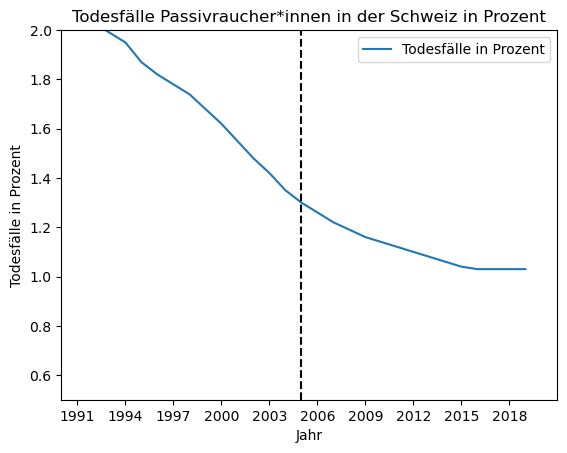

In [26]:
ax=df_switzerland.plot(x='Jahr', y='Todesfälle in Prozent', title= 'Todesfälle Passivraucher*innen in der Schweiz in Prozent',
                       xlabel='Jahr', xlim=([1990,2021]), xticks=(range(1988,2021,3)), ylabel='Todesfälle in Prozent', ylim=([0.5,2.0]))
ax.axvline(x=2005, color='black', linestyle='--')



## 1. Fragestellung(en) und Datenbeschaffung
### 1.1 Titel: 
Vergleich Anteil Raucher*innen und Todesfälle durch Passivrauchen
### 1.2 Fragestellung:
- Vergleich der Top 15 Länder mit dem höchsten und tiefsten Raucheranteil und die Todesfälle durch Passivrauchen im Jahr 2019
- Vergleich des Raucheranteils und der Todesfälle durch Passivrauchen in der Schweiz der Jahre 2000 bis 2019
### 1.3 Datenquelle(n):
https://ourworldindata.org/which-countries-smoke-most 

https://ourworldindata.org/grapher/share-deaths-secondhand-smoke





In [53]:
COL_ANTEIL_RAUCHER = 'Anteil Raucher*innen in Prozent'
COL_ANTEIL_TDF_PASSIVRAUCHEN = 'Anteil Todesfälle durch Passivrauchen in Prozent'

In [54]:
df_adult_smokers = pd.read_csv('share-of-adults-who-smoke.csv',skiprows=1,
                    names=['Gebiet','Code','Jahr',COL_ANTEIL_RAUCHER])
df_adult_smokers

,Gebiet,Code,Jahr,Anteil Raucher*innen in Prozent
0,Afghanistan,AFG,2000,36.9
1,Afghanistan,AFG,2005,32.7
2,Afghanistan,AFG,2010,29.1
3,Afghanistan,AFG,2015,26.0
4,Afghanistan,AFG,2018,23.8
...,...,...,...,...
1234,Zimbabwe,ZWE,2010,15.6
1235,Zimbabwe,ZWE,2015,13.6
1236,Zimbabwe,ZWE,2018,12.1
1237,Zimbabwe,ZWE,2019,12.1


In [55]:
df_secondhand_death = pd.read_csv('share-deaths-secondhand-smoke.csv',skiprows=1,
                    names=['Gebiet','Code','Jahr',COL_ANTEIL_TDF_PASSIVRAUCHEN])
df_secondhand_death

,Gebiet,Code,Jahr,Anteil Todesfälle durch Passivrauchen in Prozent
0,Afghanistan,AFG,1990,2.713029
1,Afghanistan,AFG,1991,2.680599
2,Afghanistan,AFG,1992,2.709394
3,Afghanistan,AFG,1993,2.736614
4,Afghanistan,AFG,1994,2.706579
...,...,...,...,...
6835,Zimbabwe,ZWE,2015,1.375695
6836,Zimbabwe,ZWE,2016,1.395783
6837,Zimbabwe,ZWE,2017,1.411269
6838,Zimbabwe,ZWE,2018,1.437165


## 2. Daten vorbereiten 
- Die Rohdaten sind im Long-Format dargestellt
- Die Bezeichnungen der Spalten wurde umbenannt von Englisch in Deutsch
- Für die Datenanalyse werden die Daten pivotiert, damit hat man einen besseren Überblick. Jede Spalte bezeichnet eine Region, die Zeilen sind die verschiedenen Jahre
- Es ist aufgefallen, dass in beiden Datensätzen nebst den Ländern auch noch Regionen und Unterteilung nach Einkommen aufgelistet ist. Diese Daten werden aus dem Datensatz entfernt, da sie zu einer Verfälschung der Datenanalyse führen. 

In [56]:
df_adult_smokers_pivot = df_adult_smokers.pivot(index='Jahr', columns='Gebiet', values=COL_ANTEIL_RAUCHER).sort_index(ascending=False)
df_adult_smokers_pivot.head()

Gebiet,Afghanistan,Albania,Algeria,Andorra,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,...,United States,Upper-middle-income countries,Uruguay,Uzbekistan,Vanuatu,Vietnam,World,Yemen,Zambia,Zimbabwe
Jahr,,,,,,,,,,,,,,,,,,,,,
2020,23.3,22.4,21.0,31.8,24.5,25.5,13.6,26.4,24.0,10.6,...,23.0,22.930624,21.5,17.6,17.8,24.8,22.978354,20.3,14.4,11.7
2019,23.8,23.0,21.0,32.0,24.9,25.8,14.0,27.1,24.2,10.7,...,23.4,23.145130,22.0,17.8,18.2,25.0,23.397316,20.5,14.6,12.1
2018,23.8,23.0,21.0,32.0,24.9,25.8,14.0,27.1,24.2,10.7,...,23.4,23.170973,22.0,17.8,18.2,25.0,23.428180,20.5,14.6,12.1
2015,26.0,25.1,21.1,33.0,26.6,26.9,15.7,31.2,25.2,10.6,...,25.3,23.911661,24.3,19.1,19.4,26.0,25.223902,21.8,15.5,13.6
2010,29.1,28.0,21.5,34.0,28.9,28.6,18.2,37.1,26.2,10.7,...,28.0,24.975590,27.5,20.9,21.3,27.0,27.767239,23.4,16.7,15.6


In [57]:
df_secondhand_death_pivot = df_secondhand_death.pivot(index='Jahr', columns='Gebiet', values=COL_ANTEIL_TDF_PASSIVRAUCHEN).sort_index(ascending=False)
df_secondhand_death_pivot.head()

Gebiet,Afghanistan,African Region (WHO),Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,Uzbekistan,Vanuatu,Venezuela,Vietnam,Wales,Western Pacific Region (WHO),World,Yemen,Zambia,Zimbabwe
Jahr,,,,,,,,,,,,,,,,,,,,,
2019,2.791570,1.073977,3.290230,3.711856,3.827399,1.243382,1.035788,1.238743,2.420651,3.533571,...,2.718653,2.761153,1.980115,3.047775,1.481642,3.331310,2.251409,3.168360,0.942231,1.449907
2018,2.743813,1.067264,3.291645,3.711007,3.819596,1.241526,1.023737,1.239448,2.424285,3.534257,...,2.745862,2.746802,1.941105,3.047227,1.482431,3.323943,2.233105,2.747396,0.921117,1.437165
2017,2.938872,1.061675,3.286291,3.711238,3.812447,1.242732,1.015294,1.237982,2.438440,3.535931,...,2.765166,2.731689,1.931500,3.043712,1.481676,3.322210,2.219164,3.111982,0.903012,1.411269
2016,2.872526,1.054566,3.280969,3.711295,3.807794,1.249886,1.013013,1.236698,2.453157,3.513029,...,2.779148,2.722259,1.924985,3.041554,1.487016,3.333784,2.213708,3.123870,0.889501,1.395783
2015,2.875231,1.045672,3.276642,3.717945,3.818943,1.261793,1.018063,1.242787,2.438819,3.529470,...,2.797489,2.698324,1.910611,3.040150,1.491672,3.349649,2.206257,3.208919,0.880667,1.375695


In [58]:
df_adult_smokers[df_adult_smokers['Code'].str.len() != 3][['Gebiet', 'Code']].drop_duplicates()

,Gebiet,Code
308,East Asia and Pacific (WB),NaN
371,Europe and Central Asia (WB),NaN
378,European Union (27),NaN
469,High-income countries,NaN
602,Latin America and Caribbean (WB),NaN
644,Low-income countries,NaN
651,Lower-middle-income countries,NaN
735,Middle East and North Africa (WB),NaN
742,Middle-income countries,NaN
840,North America (WB),NaN


In [59]:
#Vergleich richtiges Land...
df_adult_smokers.loc[df_adult_smokers['Gebiet'] == 'Uruguay']

,Gebiet,Code,Jahr,Anteil Raucher*innen in Prozent
1183,Uruguay,URY,2000,35.3
1184,Uruguay,URY,2005,31.2
1185,Uruguay,URY,2010,27.5
1186,Uruguay,URY,2015,24.3
1187,Uruguay,URY,2018,22.0
1188,Uruguay,URY,2019,22.0
1189,Uruguay,URY,2020,21.5


In [60]:
#...mit einer Region -> Region hat keinen Code
df_adult_smokers.loc[df_adult_smokers['Gebiet'] == 'Upper-middle-income countries']

,Gebiet,Code,Jahr,Anteil Raucher*innen in Prozent
1176,Upper-middle-income countries,NaN,2000,27.407335
1177,Upper-middle-income countries,NaN,2005,26.200441
1178,Upper-middle-income countries,NaN,2010,24.975590
1179,Upper-middle-income countries,NaN,2015,23.911661
1180,Upper-middle-income countries,NaN,2018,23.170973
1181,Upper-middle-income countries,NaN,2019,23.145130
1182,Upper-middle-income countries,NaN,2020,22.930624


### Unterteilung in Länder und Regionen

In [61]:
df_adult_smokers_regions = df_adult_smokers.loc[df_adult_smokers['Code'].isna()]
df_adult_smokers_regions

,Gebiet,Code,Jahr,Anteil Raucher*innen in Prozent
308,East Asia and Pacific (WB),NaN,2000,29.835900
309,East Asia and Pacific (WB),NaN,2005,28.880413
310,East Asia and Pacific (WB),NaN,2010,27.870008
311,East Asia and Pacific (WB),NaN,2015,27.027626
312,East Asia and Pacific (WB),NaN,2018,26.445005
...,...,...,...,...
1178,Upper-middle-income countries,NaN,2010,24.975590
1179,Upper-middle-income countries,NaN,2015,23.911661
1180,Upper-middle-income countries,NaN,2018,23.170973
1181,Upper-middle-income countries,NaN,2019,23.145130


In [62]:
list(df_adult_smokers_regions['Gebiet'].unique())

['East Asia and Pacific (WB)',
 'Europe and Central Asia (WB)',
 'European Union (27)',
 'High-income countries',
 'Latin America and Caribbean (WB)',
 'Low-income countries',
 'Lower-middle-income countries',
 'Middle East and North Africa (WB)',
 'Middle-income countries',
 'North America (WB)',
 'South Asia (WB)',
 'Sub-Saharan Africa (WB)',
 'Upper-middle-income countries']

In [63]:
# Ignorieren alle Codes mit NaN, da diese keine Länder sind. (~ Tilde )
df_adult_smokers = df_adult_smokers.loc[~df_adult_smokers['Code'].isna()]
df_adult_smokers

,Gebiet,Code,Jahr,Anteil Raucher*innen in Prozent
0,Afghanistan,AFG,2000,36.9
1,Afghanistan,AFG,2005,32.7
2,Afghanistan,AFG,2010,29.1
3,Afghanistan,AFG,2015,26.0
4,Afghanistan,AFG,2018,23.8
...,...,...,...,...
1234,Zimbabwe,ZWE,2010,15.6
1235,Zimbabwe,ZWE,2015,13.6
1236,Zimbabwe,ZWE,2018,12.1
1237,Zimbabwe,ZWE,2019,12.1


In [64]:
df_secondhand_death_regions = df_secondhand_death.loc[df_secondhand_death['Code'].isna()]
df_secondhand_death_regions

,Gebiet,Code,Jahr,Anteil Todesfälle durch Passivrauchen in Prozent
30,African Region (WHO),NaN,1990,1.010178
31,African Region (WHO),NaN,1991,1.002681
32,African Region (WHO),NaN,1992,1.003040
33,African Region (WHO),NaN,1993,0.985125
34,African Region (WHO),NaN,1994,0.927208
...,...,...,...,...
6715,Western Pacific Region (WHO),NaN,2015,3.349649
6716,Western Pacific Region (WHO),NaN,2016,3.333784
6717,Western Pacific Region (WHO),NaN,2017,3.322210
6718,Western Pacific Region (WHO),NaN,2018,3.323943


In [65]:
list(df_secondhand_death_regions['Gebiet'].unique())

['African Region (WHO)',
 'East Asia & Pacific (WB)',
 'Eastern Mediterranean Region (WHO)',
 'England',
 'Europe & Central Asia (WB)',
 'European Region (WHO)',
 'G20',
 'High Income (WB)',
 'Latin America & Caribbean (WB)',
 'Low Income (WB)',
 'Lower Middle Income (WB)',
 'Middle East & North Africa (WB)',
 'Middle Income (WB)',
 'North America (WB)',
 'Northern Ireland',
 'OECD Countries',
 'Region of the Americas (WHO)',
 'Scotland',
 'South Asia (WB)',
 'South-East Asia Region (WHO)',
 'Sub-Saharan Africa (WB)',
 'Wales',
 'Western Pacific Region (WHO)']

In [66]:
# Enthält Länder von Grossbritannien, diese sind nicht im Datensatz vorhanden.
df_secondhand_death_regions = df_secondhand_death_regions.loc[df_secondhand_death_regions['Gebiet'] != 'England']
df_secondhand_death_regions = df_secondhand_death_regions.loc[df_secondhand_death_regions['Gebiet'] != 'Northern Ireland']
df_secondhand_death_regions = df_secondhand_death_regions.loc[df_secondhand_death_regions['Gebiet'] != 'Scotland']
df_secondhand_death_regions = df_secondhand_death_regions.loc[df_secondhand_death_regions['Gebiet'] != 'Wales']
df_secondhand_death_regions

,Gebiet,Code,Jahr,Anteil Todesfälle durch Passivrauchen in Prozent
30,African Region (WHO),NaN,1990,1.010178
31,African Region (WHO),NaN,1991,1.002681
32,African Region (WHO),NaN,1992,1.003040
33,African Region (WHO),NaN,1993,0.985125
34,African Region (WHO),NaN,1994,0.927208
...,...,...,...,...
6715,Western Pacific Region (WHO),NaN,2015,3.349649
6716,Western Pacific Region (WHO),NaN,2016,3.333784
6717,Western Pacific Region (WHO),NaN,2017,3.322210
6718,Western Pacific Region (WHO),NaN,2018,3.323943


In [67]:
# Ignoriere alle Codes 'NaN' weil sie keine Länder sind (~ tilde is for negation)
df_secondhand_death = df_secondhand_death.loc[~df_secondhand_death['Code'].isna()]
df_secondhand_death

,Gebiet,Code,Jahr,Anteil Todesfälle durch Passivrauchen in Prozent
0,Afghanistan,AFG,1990,2.713029
1,Afghanistan,AFG,1991,2.680599
2,Afghanistan,AFG,1992,2.709394
3,Afghanistan,AFG,1993,2.736614
4,Afghanistan,AFG,1994,2.706579
...,...,...,...,...
6835,Zimbabwe,ZWE,2015,1.375695
6836,Zimbabwe,ZWE,2016,1.395783
6837,Zimbabwe,ZWE,2017,1.411269
6838,Zimbabwe,ZWE,2018,1.437165


### Beide Datensätze zusammenführen

In [68]:
# left.merge(right, ...)
# .merge(df2,left_on='df_adult_smokers',right_on='df_secondhand_death')
df_combined = pd.merge(df_adult_smokers, df_secondhand_death, how='inner', on=['Gebiet', 'Jahr'])
df_combined.head(10)

,Gebiet,Code_x,Jahr,Anteil Raucher*innen in Prozent,Code_y,Anteil Todesfälle durch Passivrauchen in Prozent
0,Afghanistan,AFG,2000,36.9,AFG,2.727965
1,Afghanistan,AFG,2005,32.7,AFG,2.874783
2,Afghanistan,AFG,2010,29.1,AFG,2.904973
3,Afghanistan,AFG,2015,26.0,AFG,2.875231
4,Afghanistan,AFG,2018,23.8,AFG,2.743813
5,Afghanistan,AFG,2019,23.8,AFG,2.791570
6,Albania,ALB,2000,35.0,ALB,4.005881
7,Albania,ALB,2005,31.3,ALB,3.546183
8,Albania,ALB,2010,28.0,ALB,3.275564
9,Albania,ALB,2015,25.1,ALB,3.276642


In [69]:
df_combined.describe()

,Jahr,Anteil Raucher*innen in Prozent,Anteil Todesfälle durch Passivrauchen in Prozent
count,984.000000,984.000000,984.000000
mean,2011.166667,24.185993,2.087325
std,6.917672,11.259123,1.133966
min,2000.000000,3.600000,0.306444
25%,2005.000000,14.900000,1.161968
50%,2012.500000,24.000000,1.841029
75%,2018.000000,31.600000,2.918114
max,2019.000000,68.500000,5.303787


In [70]:
df_combined_regions = pd.merge(df_adult_smokers_regions, df_secondhand_death_regions, how='inner', on=['Gebiet', 'Jahr'])
df_combined_regions.head(10)

,Gebiet,Code_x,Jahr,Anteil Raucher*innen in Prozent,Code_y,Anteil Todesfälle durch Passivrauchen in Prozent
0,North America (WB),NaN,2000,33.256730,NaN,1.770354
1,North America (WB),NaN,2005,29.858110,NaN,1.474630
2,North America (WB),NaN,2010,27.106386,NaN,1.276403
3,North America (WB),NaN,2015,24.316084,NaN,1.194467
4,North America (WB),NaN,2018,22.370716,NaN,1.202335
5,North America (WB),NaN,2019,22.362513,NaN,1.209982
6,South Asia (WB),NaN,2000,52.675400,NaN,2.297721
7,South Asia (WB),NaN,2005,44.246445,NaN,2.302842
8,South Asia (WB),NaN,2010,37.280846,NaN,2.329987
9,South Asia (WB),NaN,2015,31.743900,NaN,2.520235


In [71]:
df_combined_regions.describe()

,Jahr,Anteil Raucher*innen in Prozent,Anteil Todesfälle durch Passivrauchen in Prozent
count,18.000000,18.000000,18.000000
mean,2011.166667,25.400187,1.580015
std,7.114608,11.911929,0.665269
min,2000.000000,9.863432,0.875026
25%,2005.000000,15.627472,0.999587
50%,2012.500000,25.711235,1.243192
75%,2018.000000,31.272452,2.301562
max,2019.000000,52.675400,2.604729


In [72]:
df_combined.sort_values(by=[COL_ANTEIL_RAUCHER], ascending=False)

,Gebiet,Code_x,Jahr,Anteil Raucher*innen in Prozent,Code_y,Anteil Todesfälle durch Passivrauchen in Prozent
468,Kiribati,KIR,2000,68.5,KIR,4.461124
618,Myanmar,MMR,2000,66.9,MMR,2.850137
636,Nepal,NPL,2000,64.5,NPL,2.192239
630,Nauru,NRU,2000,63.4,NRU,4.304079
619,Myanmar,MMR,2005,60.6,MMR,2.658660
...,...,...,...,...,...,...
351,Ghana,GHA,2015,4.2,GHA,0.646657
664,Nigeria,NGA,2018,3.9,NGA,0.809484
665,Nigeria,NGA,2019,3.9,NGA,0.814943
352,Ghana,GHA,2018,3.6,GHA,0.655311


In [73]:
df_combined.sort_values(by=[COL_ANTEIL_TDF_PASSIVRAUCHEN],ascending=False)

,Gebiet,Code_x,Jahr,Anteil Raucher*innen in Prozent,Code_y,Anteil Todesfälle durch Passivrauchen in Prozent
691,Palau,PLW,2005,23.7,PLW,5.303787
690,Palau,PLW,2000,26.1,PLW,5.250109
692,Palau,PLW,2010,21.4,PLW,5.198391
693,Palau,PLW,2015,19.4,PLW,5.081033
762,Samoa,WSM,2000,39.0,WSM,5.075700
...,...,...,...,...,...,...
309,Ethiopia,ETH,2015,5.5,ETH,0.384553
308,Ethiopia,ETH,2010,5.9,ETH,0.367818
307,Ethiopia,ETH,2005,6.3,ETH,0.347263
306,Ethiopia,ETH,2000,6.8,ETH,0.338638


In [74]:
df_combined_pivot = df_combined.pivot(index='Jahr', columns='Gebiet', values=[COL_ANTEIL_RAUCHER, COL_ANTEIL_TDF_PASSIVRAUCHEN]).sort_index(ascending=False)
df_combined_pivot.head()

Anteil Raucher*innen in Prozent                                    \
Gebiet                     Afghanistan Albania Algeria Andorra Argentina   
Jahr                                                                       
2019                              23.8    23.0    21.0    32.0      24.9   
2018                              23.8    23.0    21.0    32.0      24.9   
2015                              26.0    25.1    21.1    33.0      26.6   
2010                              29.1    28.0    21.5    34.0      28.9   
2005                              32.7    31.3    21.8    34.8      31.5   

                                                     ...  \
Gebiet Armenia Australia Austria Azerbaijan Bahamas  ...   
Jahr                                                 ...   
2019      25.8      14.0    27.1       24.2    10.7  ...   
2018      25.8      14.0    27.1       24.2    10.7  ...   
2015      26.9      15.7    31.2       25.2    10.6  ...   
2010      28.6      18.2    37.1       26.2    10.7  ...   
2005      30.3      21.1    43.8       27.6    10.7  ...   

       Anteil Todesfälle durch Passivrauchen in Prozent                \
Gebiet                                   United Kingdom United States   
Jahr                                                                    
2019                                           1.378972      1.217634   
2018                                           1.364131      1.209584   
2015                                           1.354814      1.200598   
2010                                           1.456864      1.285334   
2005                                           1.673565      1.491306   

                                                                               \
Gebiet   Uruguay Uzbekistan   Vanuatu   Vietnam     World     Yemen    Zambia   
Jahr                                                                            
2019    2.279532   2.718653  2.761153  3.047775  2.251409  3.168360  0.942231   
2018    2.279779   2.745862  2.746802  3.047227  2.233105  2.747396  0.921117   
2015    2.287945   2.797489  2.698324  3.040150  2.206257  3.208919  0.880667   
2010    2.396479   2.912632  2.560516  3.047132  2.204271  3.216291  0.821876   
2005    2.701557   2.960434  2.389238  3.183015  2.267711  3.134504  0.665612   

                  
Gebiet  Zimbabwe  
Jahr              
2019    1.449907  
2018    1.437165  
2015    1.375695  
2010    1.167733  
2005    0.849024  

[5 rows x 328 columns]

In [75]:
df_adult_smokers.max()

Gebiet                             Zimbabwe
Code                                    ZWE
Jahr                                   2020
Anteil Raucher*innen in Prozent        68.5
dtype: object

In [76]:
df_secondhand_death.max()

Gebiet                                              Zimbabwe
Code                                                     ZWE
Jahr                                                    2019
Anteil Todesfälle durch Passivrauchen in Prozent    5.303787
dtype: object

In [77]:
# 2019 ist das letzte Jahr beider Datensätze
df_combined.max()

Gebiet                                              Zimbabwe
Code_x                                                   ZWE
Jahr                                                    2019
Anteil Raucher*innen in Prozent                         68.5
Code_y                                                   ZWE
Anteil Todesfälle durch Passivrauchen in Prozent    5.303787
dtype: object

In [78]:
df_combined_2019 = df_combined[df_combined['Jahr'] == 2019]
df_combined_2019

,Gebiet,Code_x,Jahr,Anteil Raucher*innen in Prozent,Code_y,Anteil Todesfälle durch Passivrauchen in Prozent
5,Afghanistan,AFG,2019,23.800000,AFG,2.791570
11,Albania,ALB,2019,23.000000,ALB,3.290230
17,Algeria,DZA,2019,21.000000,DZA,3.711856
23,Andorra,AND,2019,32.000000,AND,1.243382
29,Argentina,ARG,2019,24.900000,ARG,2.420651
...,...,...,...,...,...,...
959,Vietnam,VNM,2019,25.000000,VNM,3.047775
965,World,OWID_WRL,2019,23.397316,OWID_WRL,2.251409
971,Yemen,YEM,2019,20.500000,YEM,3.168360
977,Zambia,ZMB,2019,14.600000,ZMB,0.942231


## 4. Analyse 

### Beobachtungen
- Bei den Top 15 Ländern mit dem höchsten Raucheranteil sind die Todesfälle durch Passivrauchen alle unter 5%. 
- Bei den Top 15 Ländern mit den tiefsten Raucheranteil fällt auf, dass die Todesfälle durch Passivrauchen bei den Ländern Turkemnistan und Oman eher hoch sind. 
- Bei der Schweiz fällt auf, dass der Raucheranteil mit ~ 25% recht hoch ist. Die Todesfälle durch Passivrauchen sind aber eher gering. 
- Im Scattergram sieht man eine breite Streuung.



### Interpretation
- Trotz hohem Raucheranteil sterben wenige Menschen durch Passivrauchen. 

- Trotz tiefem Raucheranteil in Turkemistan gibt es verhältnismässig viele Todesfälle durch Passivrauchen. In Turkmenistan sind die Gesetze sehr restriktiv und das Ziel ist es das Land komplett rauchfrei zu machen. Die erhöhten Todesfälle sind wohmöglich durch das schlechte Gesundheitssystem zu erkären; Bestechung für medizinische Leistungen ist weit verbreitet. Ausserdem ist die Luftqualität schlecht, dies kann wohmöglich Symptome durch Passvirauchen zusätzlich verschlechtern. 

- In der Schweiz sieht man einen leichten Rückgang des Raucheranteils als das Verbot für das Rauchen in Innenräumen und im Öffentlichen Verkehr in Kraft getreten ist. Ansonsten ist der Raucheranteil relativ konstant über die Jahre 2000 bis 2019. 
- Die Todesfälle durch Passivrauchen zeigen in der Schweiz einen leichten Rückgang. 
- Im Scattergram sieht man eine breite Streuung, es ist keine eindeutiger Zusammenhang zwischen den Raucheranteil und den Todesfällen durch Passivrauchen zu erkennen. Man sieht, dass in vielen Ländern zwischen 10 und 20% der Bevölkerung rauchen. 


### Quellen
Turkmenistan
- https://www.rferl.org/a/turkmenistan-health-care-shortcomings/25322982.html
- https://www.traveldoctor.network/country/turkmenistan/risk/air-pollution/
- https://www.arabnews.com/node/2319511/world


Schweiz
- https://www.admin.ch/gov/de/start/dokumentation/medienmitteilungen.msg-id-59810.html
https://www.bag.admin.ch/bag/de/home/strategie-und-politik/politische-auftraege-und-aktionsplaene/politische-auftraege-zur-tabakpraevention/tabakpolitik-schweiz/schutz-vor-passivrauchen.html


In [79]:
df_top_15_countries = df_combined_2019.sort_values(by=COL_ANTEIL_RAUCHER, ascending=True).tail(15)
df_top_15_countries

,Gebiet,Code_x,Jahr,Anteil Raucher*innen in Prozent,Code_y,Anteil Todesfälle durch Passivrauchen in Prozent
239,Cyprus,CYP,2019,35.5,CYP,1.782498
113,Bosnia and Herzegovina,BIH,2019,35.5,BIH,3.325279
911,Tuvalu,TUV,2019,36.0,TUV,4.428083
227,Croatia,HRV,2019,36.7,HRV,2.810798
827,Solomon Islands,SLB,2019,36.8,SLB,4.399038
497,Latvia,LVA,2019,37.2,LVA,1.748161
407,Indonesia,IDN,2019,37.2,IDN,2.859331
503,Lebanon,LBN,2019,38.4,LBN,3.940480
137,Bulgaria,BGR,2019,39.4,BGR,2.446368
269,East Timor,TLS,2019,39.8,TLS,2.743662


<Axes: title={'center': 'Vergleich der 15 Länder mit höchstem Anteil Raucher*innen\n mit Anteil Todesfällen (2019)'}, xlabel='Gebiet', ylabel='Prozent'>

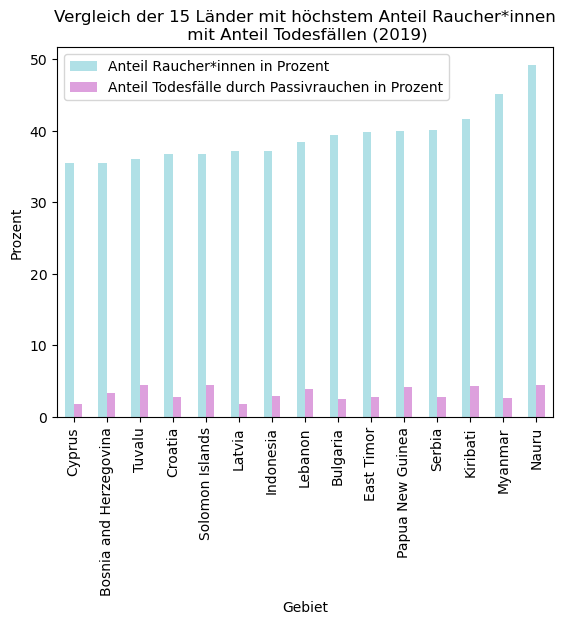

In [80]:
color_dict = {
    COL_ANTEIL_RAUCHER: 'powderblue',
    COL_ANTEIL_TDF_PASSIVRAUCHEN: 'plum'
}
df_top_15_countries.drop(columns='Jahr').plot(kind='bar', x='Gebiet',color=color_dict,ylabel='Prozent',
                                              title='Vergleich der 15 Länder mit höchstem Anteil Raucher*innen\n mit Anteil Todesfällen (2019)')

In [81]:
df_lowest_15_countries = df_combined_2019.sort_values(by=COL_ANTEIL_RAUCHER, ascending=False).tail(15)
df_lowest_15_countries


,Gebiet,Code_x,Jahr,Anteil Raucher*innen in Prozent,Code_y,Anteil Todesfälle durch Passivrauchen in Prozent
287,El Salvador,SLV,2019,8.3,SLV,0.949961
383,Haiti,HTI,2019,7.9,HTI,0.932274
683,Oman,OMN,2019,7.9,OMN,2.749158
293,Eritrea,ERI,2019,7.7,ERI,0.937620
659,Niger,NER,2019,7.6,NER,0.963115
161,Cameroon,CMR,2019,7.5,CMR,0.791691
101,Benin,BEN,2019,7.2,BEN,0.911622
785,Senegal,SEN,2019,7.1,SEN,2.034713
881,Togo,TGO,2019,7.1,TGO,1.108328
773,Sao Tome and Principe,STP,2019,5.8,STP,0.599214


<Axes: title={'center': 'Vergleich der 15 Länder mit tiefestem Anteil Raucher*innen\n mit Anteil Todesfällen (2019)'}, xlabel='Gebiet', ylabel='Prozent'>

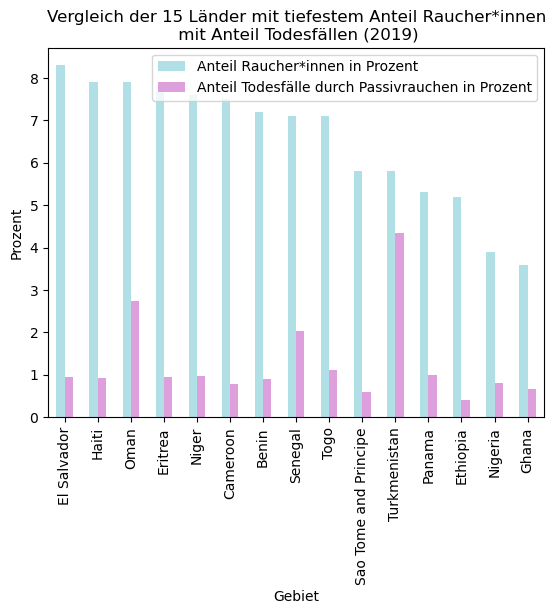

In [82]:
df_lowest_15_countries.drop(columns='Jahr').plot(kind='bar', x='Gebiet',color=color_dict,ylabel='Prozent',
                                                 title='Vergleich der 15 Länder mit tiefestem Anteil Raucher*innen\n mit Anteil Todesfällen (2019)')


<Axes: xlabel='Anteil Raucher*innen in Prozent', ylabel='Anteil Todesfälle durch Passivrauchen in Prozent'>

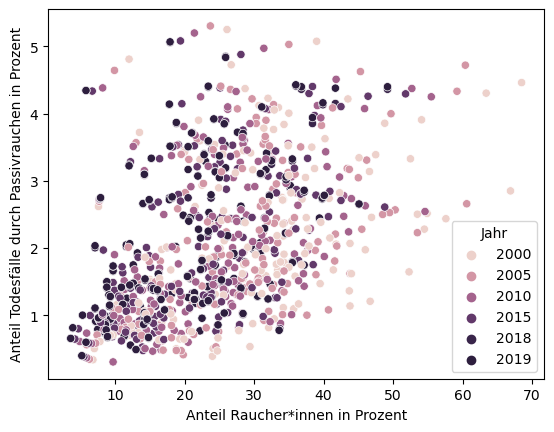

In [87]:
sns.scatterplot(x=COL_ANTEIL_RAUCHER, y=COL_ANTEIL_TDF_PASSIVRAUCHEN,data=df_combined, hue='Jahr')

In [ ]:
df_Schweiz=df_combined.loc[df_combined['Gebiet']=='Switzerland']
df_Schweiz

,Gebiet,Code_x,Jahr,Anteil Raucher*innen in Prozent,Code_y,Anteil Todesfälle durch Passivrauchen in Prozent
858,Switzerland,CHE,2000,28.3,CHE,1.618323
859,Switzerland,CHE,2005,27.7,CHE,1.299845
860,Switzerland,CHE,2010,26.9,CHE,1.137501
861,Switzerland,CHE,2015,26.2,CHE,1.039309
862,Switzerland,CHE,2018,25.7,CHE,1.030093
863,Switzerland,CHE,2019,25.7,CHE,1.033835


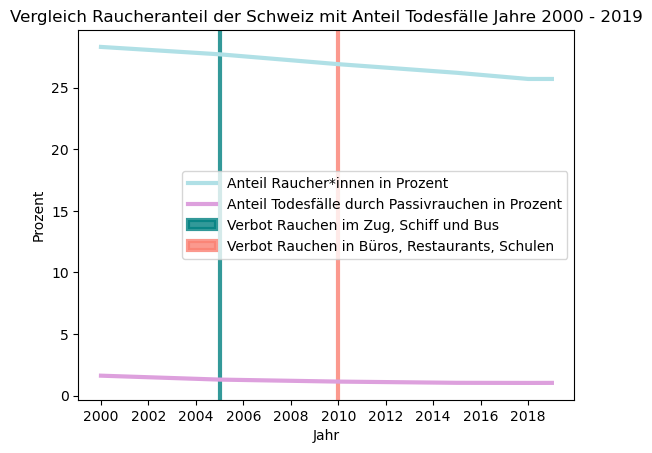

In [ ]:
ax=df_Schweiz.plot(kind='line',x='Jahr',color=color_dict,ylabel='Prozent', xticks=(range(2000,2019,2)),
                   title='Vergleich Raucheranteil der Schweiz mit Anteil Todesfälle Jahre 2000 - 2019',lw=3)
ax.axvspan(2005,2005,color='teal',alpha=0.8,lw=3,label='Verbot Rauchen im Zug, Schiff und Bus')
ax.axvspan(2010,2010,color='salmon',alpha=0.8,lw=3,label='Verbot Rauchen in Büros, Restaurants, Schulen')
ax.legend()
